In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [ ]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
# Klausimai:
# Ar buvo mėnesių, kurie išssikirtų gaisringumu?
# Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 



# Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?


# polars
# pyspark

# gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras')]

# Mantui 
# dfgaisrai2 = dfgaisrai2[~dfgaisrai2['zemesnis_ivykio_tipas'].str.contains('0')]

# .dropna()

# df.dropna(subset=['stulpelio pavadinimas'])

# df['stulpelis'].fillna(norima vertė)






#Suraskite 2013-2023 metų eismo įvykuose daugiausiai kartų užfiksuotą automobilių
# a) gamintoją b) modelį. 
# Kiekvienais metais tas gamintojas/modelis gali būti skirtingas - pateikite bar/barh grafikus.
# Kiek iš užfiksuotų automobilių turėjo Kasko draudimą?

In [21]:
df = pd.read_csv('../../../eismas/gpc.csv')
df.head()

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id
0,455179,6202578,2.1,8a05b17d59f0,2022,3,BPC-GMP,GMP įvykis,1
1,496996,6088060,2.1,c9ffee4c15df,2022,3,BPC-GMP,GMP įvykis,2
2,396311,6243084,2.1,c349aa73f059,2022,3,BPC-GMP,GMP įvykis,3
3,509278,6113549,2.1,23b71b2f9a07,2022,3,BPC-GMP,GMP įvykis,4
4,323452,6174157,6.1.2,a15a6960d21f,2022,3,Policijos įvykiai,KET pažeidimas,5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970925 entries, 0 to 1970924
Data columns (total 9 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   X                        int64 
 1   Y                        int64 
 2   ivykio_tipo_kodas        object
 3   ivykio_id                object
 4   metai                    int64 
 5   menuo                    int64 
 6   aukstesnis_ivykio_tipas  object
 7   zemesnis_ivykio_tipas    object
 8   object_id                int64 
dtypes: int64(5), object(4)
memory usage: 135.3+ MB


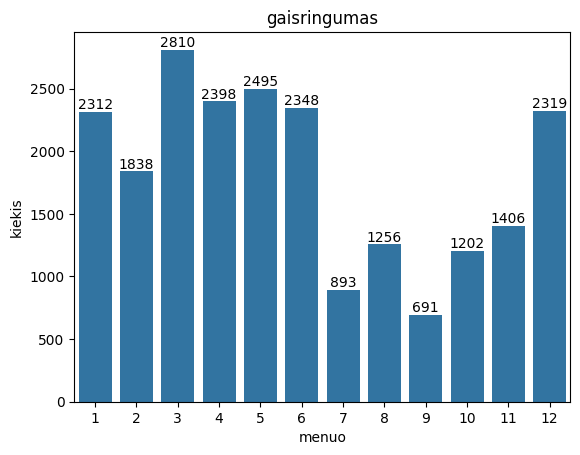

In [43]:
# gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras')]
df_gaisrai = df[df['zemesnis_ivykio_tipas'].str.contains('Gaisras', na=False)]
df_gaisrai.head()

df_g_group = df_gaisrai.groupby('menuo').count().reset_index()


fig, axis = plt.subplots()

sns.barplot(data=df_g_group, x='menuo', y='zemesnis_ivykio_tipas')
axis.set_ylabel('kiekis')
plt.title('gaisringumas')

for container in axis.containers:
    axis.bar_label(container)

plt.show()

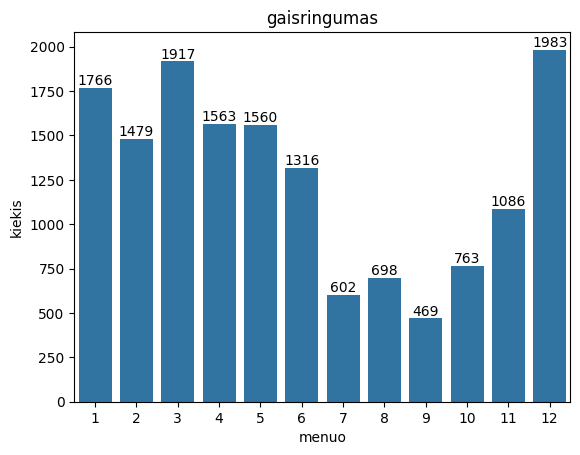

In [50]:

df_g2 = df_gaisrai[~df_gaisrai['zemesnis_ivykio_tipas'].str.contains('0')]
df_g2.head()
df_g2_group = df_g2.groupby('menuo').count().reset_index()


fig, axis = plt.subplots()

sns.barplot(data=df_g2_group, x='menuo', y='zemesnis_ivykio_tipas')
axis.set_ylabel('kiekis')
plt.title('gaisringumas')

for container in axis.containers:
    axis.bar_label(container)

plt.show()

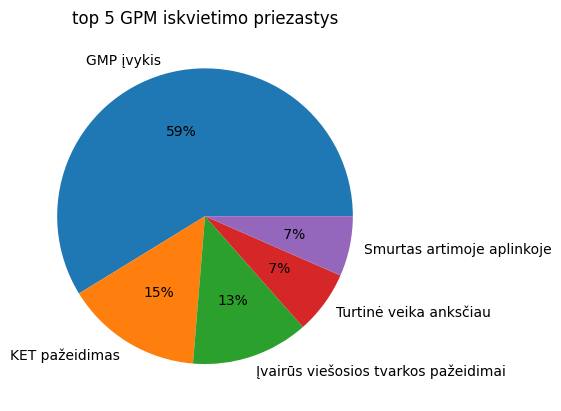

In [54]:
# kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.


top5 = df['zemesnis_ivykio_tipas'].value_counts()[:5]
fig, axis = plt.subplots()

axis.pie(top5.values, labels=top5.index, autopct='%2.f%%')
plt.title('top 5 GPM iskvietimo priezastys')

plt.show()





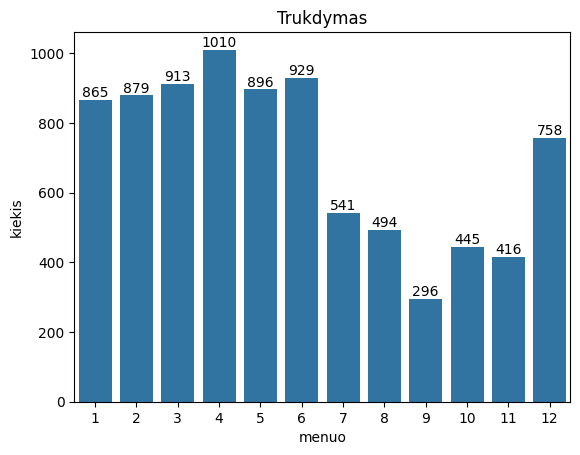

In [55]:
# ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?

df_trukdo = df[df['zemesnis_ivykio_tipas'].str.contains('TRUKDANTIS', na=False)]
df_trukdo.head()

df_trukdo_group = df_trukdo.groupby('menuo').count().reset_index()


fig, axis = plt.subplots()

sns.barplot(data=df_trukdo_group, x='menuo', y='zemesnis_ivykio_tipas')
axis.set_ylabel('kiekis')
plt.title('Trukdymas')

for container in axis.containers:
    axis.bar_label(container)

plt.show()
# 


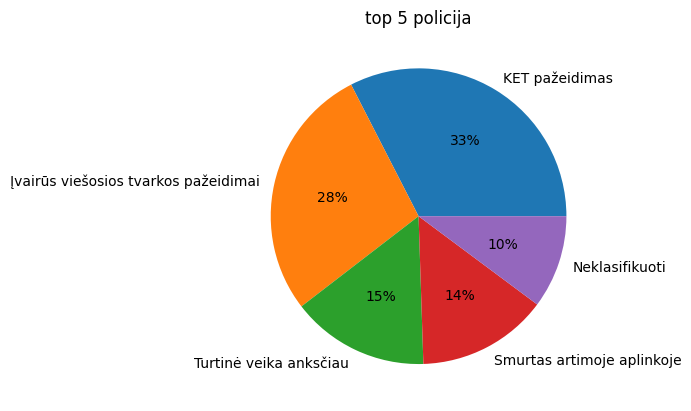

In [58]:
# pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
# Pateikite procentinį įvertinimą.

top5_policija = df[df['aukstesnis_ivykio_tipas'] == 'Policijos įvykiai']['zemesnis_ivykio_tipas'].value_counts()[:5]
top5_policija.head()

fig, axis = plt.subplots()

axis.pie(top5_policija.values, labels=top5_policija.index, autopct='%2.f%%')
plt.title('top 5 policija')

plt.show()

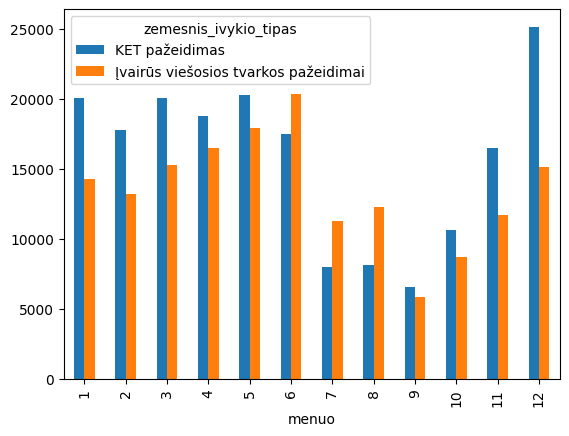

In [71]:
# Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?

df_compare = df[(df['zemesnis_ivykio_tipas'] == 'KET pažeidimas') | 
                (df['zemesnis_ivykio_tipas'] == 'Įvairūs viešosios tvarkos pažeidimai')][['menuo', 'zemesnis_ivykio_tipas']]

df_compare_group = df_compare.groupby('menuo').value_counts()
df_compare_group


fig, axis = plt.subplots()
df_compare.groupby(['menuo', 'zemesnis_ivykio_tipas'])['zemesnis_ivykio_tipas'].count().unstack().plot(kind='bar')

# for container in axis.containers:
#     axis.bar_label(container)

plt.show()

In [72]:
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/27c22303570541fd9dae7299be45d601_0/about


# kurioje seniūnijoje daugiausiasi renovuotų pastatų?
# kokios trys seniūnijos yra renovacijos priekyje?

df_kns = pd.read_csv('../../../eismas/kauno_daugiabuciai.csv')
df_kns.head()

,X,Y,vda_id,seniunija,gatve,namo_nr,butu_sk,negyvenamu_sk,aukstu_sk,namo_plotas,zemes_plotas,statybos_metai,valdymo_forma,valdytojas,admin_pabaiga,ar_perduotas,bukle,atlikti_darbai,object_id,geom
0,NaN,NaN,4fc5a7d3836798b,NaN,Vilniaus g.,24A,NaN,0,NaN,0.00,0.0,NaN,Bendrija,NaN,NaN,1,NaN,NaN,1,NaN
1,496691.0,6081114.0,0890dd305e40157,Šančių,A. Juozapavičiaus pr.,20,22.0,0,4.0,1323.68,0.0,1958/01/01 00:00:00+00,Jungtinės veiklos sutartis,JVS A. Juozapavičiaus 20,2015/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, tinkuojamas fasadas,...",2,NaN
2,496194.0,6081568.0,98974b9870e990b,Šančių,A. Juozapavičiaus pr.,46,23.0,1,3.0,869.67,0.0,1950/01/01 00:00:00+00,Administratorius,"Civinity namai Kaunas, UAB",2016/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, ventiliuojamas fasada...",3,NaN
3,492920.0,6085540.0,80cb2d1f7a6c1fa,Vilijampolės,A. Kriščiukaičio g.,6,48.0,0,12.0,3422.00,0.0,1960/01/01 00:00:00+00,Bendrija,"DNSB ""K6""",2017/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",4,NaN
4,497636.0,6081522.0,f92748df3ba9189,Panemunės,A. Smetonos al.,43,9.0,0,3.0,462.99,0.0,1960/01/01 00:00:00+00,Bendrija,"DNSB ""Bičiulių alėja""",2015/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",5,NaN


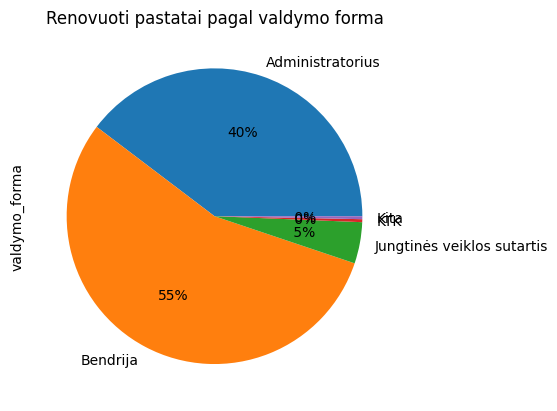

In [77]:
# Ar yra skirtumas tarp to, kas administruoja
# pastatą, ir noro renovuotis? (Suraskite, kiek procentų yra renovavęsi
# pagal administravimo pobūdį)

df_reno = df_kns[df_kns['bukle'] == 'Renovuotas']
df_reno.groupby('valdymo_forma')['valdymo_forma'].count().plot(kind='pie', autopct='%2.f%%')
plt.title('Renovuoti pastatai pagal valdymo forma')
plt.show()

In [92]:
# Ar galima teigti, kad kuo senesnis pastatas, tuo gyventojai
# nori labiau renovacijos? 
# (pastatų amžius vs renovuotų tokio amžiaus pastatų kiekis)
print(df_reno.columns)

df_reno['statybos_metai'] = pd.to_datetime(df_reno['statybos_metai'])

df_reno.head(2)
# df_reno['metai'] = df_reno['statybos_metai'].index[:4]
# df_reno.head(2)

# df_reno.groupby('statybos_metai')['statybos_metai'].count().plot(kind='bar')
# plt.show()

Index(['X', 'Y', 'vda_id', 'seniunija', 'gatve', 'namo_nr', 'butu_sk',
       'negyvenamu_sk', 'aukstu_sk', 'namo_plotas', 'zemes_plotas',
       'statybos_metai', 'valdymo_forma', 'valdytojas', 'admin_pabaiga',
       'ar_perduotas', 'bukle', 'atlikti_darbai', 'object_id', 'geom',
       'metai'],
      dtype='object')


,X,Y,vda_id,seniunija,gatve,namo_nr,butu_sk,negyvenamu_sk,aukstu_sk,namo_plotas,...,statybos_metai,valdymo_forma,valdytojas,admin_pabaiga,ar_perduotas,bukle,atlikti_darbai,object_id,geom,metai
1,496691.0,6081114.0,0890dd305e40157,Šančių,A. Juozapavičiaus pr.,20,22.0,0,4.0,1323.68,...,1958-01-01 00:00:00+00:00,Jungtinės veiklos sutartis,JVS A. Juozapavičiaus 20,2015/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, tinkuojamas fasadas,...",2,NaN,1958/01/01 00:00:00+00
2,496194.0,6081568.0,98974b9870e990b,Šančių,A. Juozapavičiaus pr.,46,23.0,1,3.0,869.67,...,1950-01-01 00:00:00+00:00,Administratorius,"Civinity namai Kaunas, UAB",2016/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, ventiliuojamas fasada...",3,NaN,1950/01/01 00:00:00+00
